## Question 1: Use yfinance to Extract Stock Data

In [55]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def make_graph(stock_data, revenue_data, stock):
    # Ensure stock_data and revenue_data are DataFrame objects
    if not isinstance(stock_data, pd.DataFrame):
        raise TypeError("stock_data should be a DataFrame")
    if not isinstance(revenue_data, pd.DataFrame):
        raise TypeError("revenue_data should be a DataFrame")
    
    # Convert Date column to datetime type for proper filtering
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])
    
    # Filter data based on specific dates
    stock_data_specific = stock_data[stock_data["Date"] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data["Date"] <= '2021-04-30']
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    
    fig.add_trace(go.Scatter(x=stock_data_specific["Date"], y=stock_data_specific["Close"].astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_specific["Date"], y=revenue_data_specific["Revenue"].astype("float"), name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()


#  create an object
tesla = yf.Ticker("TSLA")

# extract the share price
tesla_data = tesla.history(period="max")

# reset the index
tesla_data.reset_index(inplace=True)

# get thte dataframe
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [ ]:
# create url object
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# get the data
html_data = requests.get(url).text

# parse the data
soup = BeautifulSoup(html_data, 'html5lib')

# find the Tesla Revenue table
table = soup.find_all("table")[1]

# extract rows from the table
rows = table.find_all("tr")

# prepare data for DataFrame
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace(",", "").replace("$", "")
    data.append([date, revenue])

# create DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# remove an null or empty strings in the Revenue column.
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# display the DataFrame
tesla_revenue.tail()


## Question 3: Use yfinance to Extract Stock Data

In [56]:
# extract stock data from GME
gme = yf.Ticker("GME")

# extract the share price
gme_data = gme.history(period="max")

# reset the index
gme_data.reset_index(inplace=True)

# get thte dataframe
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [ ]:
# create url object
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# get the data
html_data = requests.get(url).text

# parse the data
soup = BeautifulSoup(html_data, 'html5lib')

# find the GME Revenue table
table = soup.find_all("table")[1]

# extract rows from the table
rows = table.find_all("tr")

# prepare data for DataFrame
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace(",", "").replace("$", "")
    data.append([date, revenue])

# create DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# remove an null or empty strings in the Revenue column.
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# display the DataFrame
print(gme_revenue.tail())

## Question 5: Plot Tesla Stock Graph

In [ ]:
# Assuming you have already fetched and processed tesla_share_price_data and tesla_revenue

# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')

# Set a title for the graph
plt.title('Tesla Stock Price and Revenue Data (up to June 2021)')

# Display the graph
plt.show()

## Question 6: Plot GameStop Stock Graph

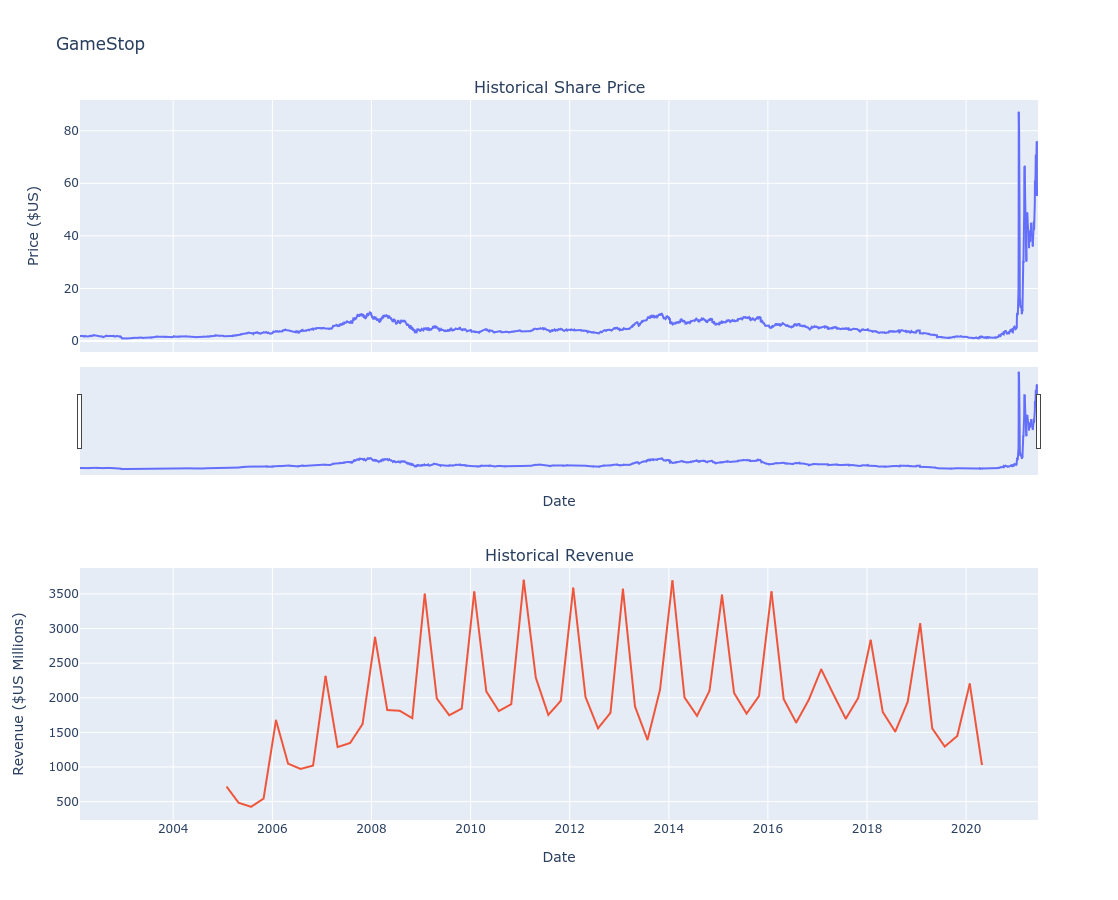

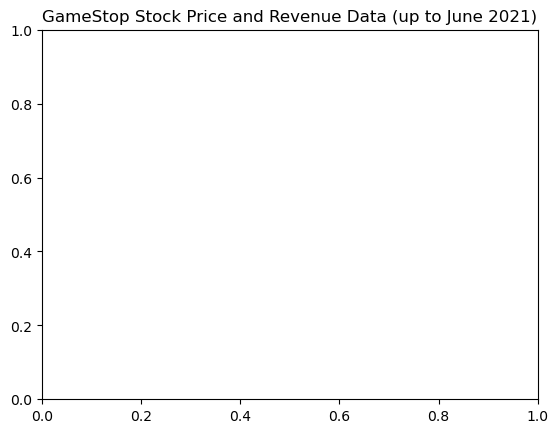

In [57]:
# Call the make_graph function
make_graph(gme_data, gme_revenue, "GameStop")

# Set a title for the graph
plt.title('GameStop Stock Price and Revenue Data (up to June 2021)')

# Display the graph
plt.show()